# Session 4.1 Modeling Capacity

### Goals:

1. Linear Data, Linear Model
2. Quad Data, Linear Model
3. Quad Data, Quad Model

In [12]:
from matplotlib import pyplot as plt
import numpy as np
from IPython import display

import seaborn as sns
import torch

In [13]:
torch.manual_seed(42)

In [3]:
def viz_1d(X, Y, title = None):
    
    if isinstance(Y, torch.Tensor):
        Y = Y.detach()
        
    plt.figure(figsize=(7, 4))
    if title:
        plt.title(title)
    plt.scatter(X, Y)
    plt.show()

def viz_pred(X, Y, Y_, title=None):
    
    if isinstance(Y_, torch.Tensor):
        Y_ = Y_.detach()
        
    plt.figure(figsize=(14, 10))
    if title:
        plt.title(title)
        
    plt.plot(X, Y, 'o')
    plt.plot(X, Y_, '+')
#     plt.scatter(X, Y, color='red')
    plt.show()
    
def viz_all(model, inputs,outputs= None, predictions= None,  ax=None ):
    inputs_scale = (inputs.max()-inputs.min())/10.0
    _X = torch.tensor(np.mgrid[inputs.min()-inputs_scale: inputs.max()+inputs_scale:0.1])
    with torch.no_grad():
        _Y = model(_X).detach()
        
    if ax is None: 
        fig = plt.figure(figsize=(14, 8), dpi=100)
        ax = fig.add_subplot(111)
        old_ax = False
    else:
        old_ax = True
    
    if outputs is not None:
        ax.scatter(inputs, outputs,  c='b', marker="s", label='Y Gold')
    
    if predictions is not None:
        ax.scatter(inputs, predictions, c='r', marker='+', label='Y Pred')
    
    ax.plot(_X, _Y, label='model')
    if not old_ax:
        plt.legend(loc='upper left')
        plt.show()
    
def report(model: torch.nn.Module, title='Parameters before update:'):
    op = title[::]
    for np in model.named_parameters():
        op += f"\n\t{np[0]}: {np[1].data.item() if not np[1].shape.__len__()>1 else np[1].data}\tgrad: {np[1].grad if np[1].grad is not None else None}"
    print(op)

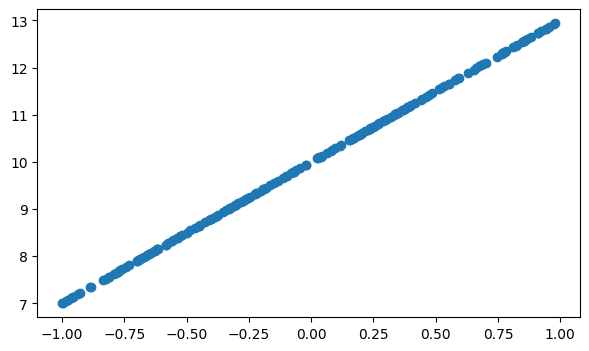

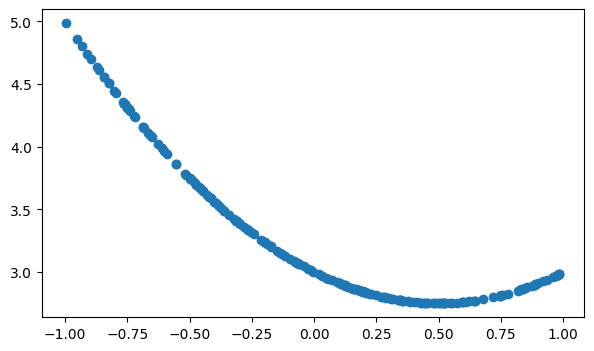

In [ ]:
# Lets define some objective functions
def true_fn_lin(x):
    return float(3*x + 10)

def true_fn_quad(x):
    return float(x**2 - (x) + 3)

n_samples = 200
X_lin = torch.randint(-400, 400, (n_samples,)).float() / 400
Y_lin = torch.tensor([true_fn_lin(x) for x in X_lin])
X_quad = torch.randint(-400, 400, (n_samples,)).float() / 400
Y_quad = torch.tensor([true_fn_quad(x) for x in X_quad])
fx = lambda x : (m*x) + c
viz_1d(X_lin, Y_lin)
viz_1d(X_quad, Y_quad)

In [ ]:
# fx = lambda x : (m*x) + c


class LinClf(torch.nn.Module):
    
    def __init__(self,):
        # we declare the params here
        super().__init__()
        
        self.m = torch.nn.Parameter(torch.tensor(0.5))
        self.c = torch.nn.Parameter(torch.tensor(0.1))
        
    def forward(self, inputs):
        # we define 'what to do with params here'
        return (inputs * self.m) + self.c
    

In [ ]:
# How about a quadratic model (a1*x*x + a2*x + a3)
    

In [ ]:
# Make model(s)
m = LinClf()

In [8]:
# Hyperparams
epochs = 2000
lr = 0.01

#  and loss fn
lfn = torch.nn.MSELoss(reduction='sum')


# Your Recepie goes here

In [ ]:
X = X_lin
Y = Y_lin
opt = torch.optim.SGD(m.parameters(), lr=lr)

Model fully converged at 156. Stopping.


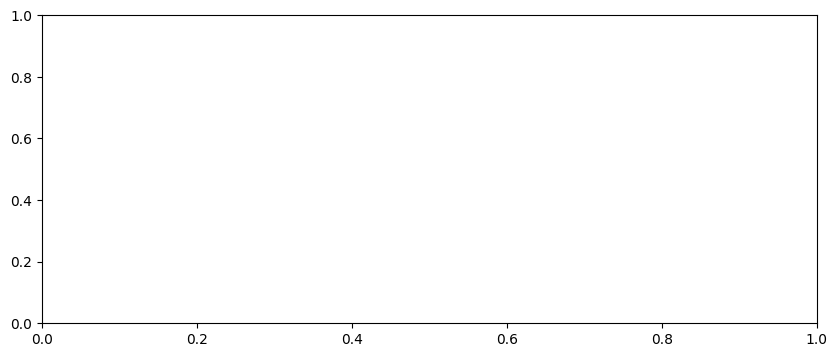

In [10]:

fig = plt.figure(figsize = (10,4))
ax1 = fig.add_subplot(111)
# xlim = (-1,2, 1.2)
# ylim = (-1, 14)
# ax1.set_xlim(-1.2, 1.2)
# ax1.set_ylim(-1, 14)
losses = []

# our dataset = X, Y

for e in range(epochs):

    opt.zero_grad() 
    
    # Lets sample a batch
    Xrange = torch.randint(0, n_samples, (20, ))
    _X = X[Xrange]
    _Y = Y[Xrange]
    
    # Make model predictions
    Y_pred = m(_X)
    
    # Calculate Loss
    loss = lfn(Y_pred, _Y)
    
    report(m, "Parameters before update")
    loss.backward()    
    opt.step()
    report(m, "Parameters after update")
    
    with torch.no_grad():
        ...
        print(loss.item())
#         ax1.set_xlim(xlim[0], xlim[1])
#         ax1.set_ylim(ylim[0], ylim[1])
        viz_all(model=m, inputs=_X, outputs=_Y, ax=ax1)
#         viz_all(model=m, inputs=_X, outputs=_Y)
        display.display(plt.gcf())

    cmd = input('$: ')
    if cmd.lower().strip() in ['quit', 'q', 'exit', 'stop']:
        break

    plt.cla()
    display.clear_output(wait =True)
    losses.append(loss.item())
        
    if loss.item() < 0.001:
        print(f'Model fully converged at {e}. Stopping.')
        break

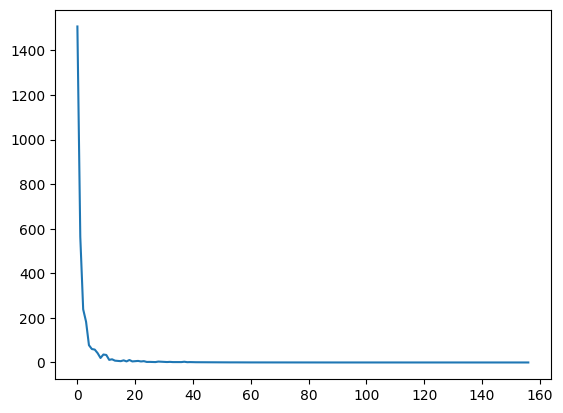

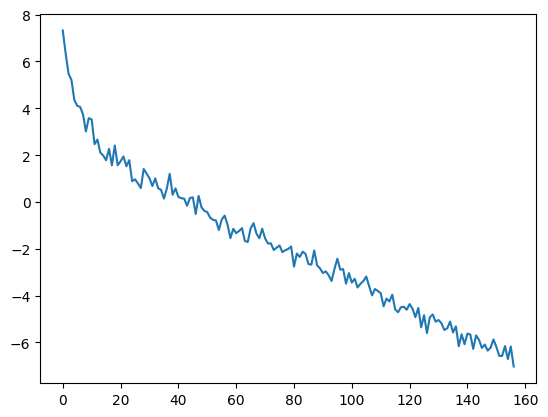

In [11]:
plt.plot(losses)
plt.show()
plt.plot(torch.log(torch.tensor(losses)))
plt.show()